In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

In [2]:
# Input signal
x = np.array([1, 2, 3, 1])
# LTI system impulse response
h = np.array([1, 2, 1, -1])
# Responses for Associative and Distributive analysis
h1 = np.array([1, 0, -1])
h2 = np.array([2, 1])

In [6]:
len_y = len(x) + len(h) - 1 
# print(len_y)
for n in range(len_y):
    print(n)

0
1
2
3
4
5
6


# Convultion

In [8]:
# Define convultion equation which takes as inputs x signal and h impulse response
def convolution(x, h):
    len_y = len(x) + len(h) - 1 
    y = np.zeros(len_y)

    for n in range(len_y):

        for k in range(len(x)):
            if n-k >= 0 and n - k < len(h):
                y[n] += x[k] * h[n - k]

    return y

In [9]:

# Calculate the LTI system response with convolution
y = convolution(x, h)
print(y)

[ 1.  4.  8.  8.  3. -2. -1.]


In [10]:
y = convolve(x, h)
print(y)

[ 1  4  8  8  3 -2 -1]


## Commutative law
x * h = h * x

In [11]:
y1 = convolution(x, h)
y2 = convolution(h, x)
print(y1)
print(y2)

[ 1.  4.  8.  8.  3. -2. -1.]
[ 1.  4.  8.  8.  3. -2. -1.]


## Associative law
x * (h1 * h2) = (x * h1) * h2

In [12]:
y1 = convolution(x, convolution(h1, h2))
y2 = convolution(convolution(x, h1), h2)
print(y1)
print(y2)

[ 2.  5.  6.  0. -7. -5. -1.]
[ 2.  5.  6.  0. -7. -5. -1.]


## Distributive law
x * (h1 + h2) = (x * h1) + (x * h2)

In [16]:
# We pad h2 with zero in order to have sum of h1 and h2 with same dimensions
h_sum = h1 + np.array([2, 1, 0])
y1 = convolution(x, h_sum)
y2 = convolution(x, h1) 
y3 = convolution(x, h2)
print("y1 = x * (h1 + h2)", y1)
print('============')
print("y2 = x * h1", y2)
print("y3 = x * h2", y3)

y1 = x * (h1 + h2) [ 3.  7. 10.  4. -2. -1.]
y2 = x * h1 [ 1.  2.  2. -1. -3. -1.]
y3 = x * h2 [2. 5. 8. 5. 1.]


## Difference Equation
y[n] = 0.5y[n-1] + x[n]

In [17]:
from scipy.signal  import lfilter

x = np.ones(10)
a = [1, -0.5]
b = [1]

y = lfilter(b, a, x)
print(x)
print('=====================')
print(y)



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.         1.5        1.75       1.875      1.9375     1.96875
 1.984375   1.9921875  1.99609375 1.99804688]


C:\Users\yasse\AppData\Local\Temp\ipykernel_14552\1477874637.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(y)), y, label='Response', use_line_collection=True)
C:\Users\yasse\AppData\Local\Temp\ipykernel_14552\1477874637.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(x)), x, label='Input Unit Step', linefmt='r', use_line_collection=True)


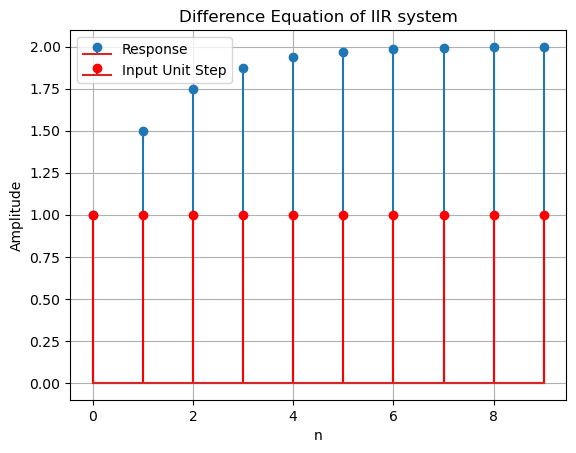

In [18]:
plt.figure()
plt.stem(range(len(y)), y, label='Response', use_line_collection=True)
plt.stem(range(len(x)), x, label='Input Unit Step', linefmt='r', use_line_collection=True)
plt.title('Difference Equation of IIR system')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Correlation
## Cross Correlation

In [19]:
# First Signal
x = np.array([1, 2, 3, 4])
# Second Signal
y = np.array([1, -1, 2])

In [20]:

xy_corr = np.correlate(x, y, mode='full')
print(xy_corr)


[ 2  3  5  7 -1  4]


In [21]:
xy_corr2 = convolution(x, y)
print(xy_corr2)

[1. 1. 3. 5. 2. 8.]


In [22]:
xx_corr = np.correlate(x, x, mode='full')
print(xx_corr)

[ 4 11 20 30 20 11  4]


In [24]:
yy_corr = np.correlate(y, y, mode='full')
print(yy_corr)

[ 2 -3  6 -3  2]
